In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
bodyfat = pd.read_csv("../../data/raw/bodyfat.csv")

In [18]:
columns = ['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
           'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
           'Wrist']
raw= [[1.0502, 20.9, 24., 210.25, 74.75, 39.,
             104.5, 94.4, 107.8, 66., 42., 25.6,
             35.7, 30.6, 18.8],
            [1.0549, 19.2, 26., 181., 69.75, 36.4,
             105.1, 90.7, 100.3, 58.4, 38.3, 22.9,
             31.9, 27.8, 17.7],
            [1.0704, 12.4, 25., 176., 72.5, 37.8,
             99.6, 88.5, 97.1, 60., 39.4, 23.2,
             30.5, 29., 18.8],
            [1.09, 4.1, 25., 191., 30, 38.1,
             100.9, 82.5, 99.9, 62.9, 38.3, 23.8,
             35.9, 31.1, 18.2],
            [1.0722, 11.7, 23., 198.25, 100, 42.1,
             99.6, 88.6, 104.1, 63.1, 41.7, 25.,
             35.6, 30., 19.2]]
data = [[float(d) for d in row] for row in raw]
input = pd.DataFrame(data, columns=columns)

In [21]:
def extract_features(data, features_column):
    """ Extract features from dataframe
             Args:
                data (`:obj:`pd.DataFrame`): Dataframe
                features_column(`list` of `str`):  Column names for features
             Returns:
                features (`:obj:`pd.DataFrame`): Feature dataframe
    """

    features = data[features_column]

    return features

In [23]:
initial_features=['Age', 'Weight', 'Height', 'Neck', 'Chest']
extract_features(input,features_column=initial_features).values

array([[ 24.  , 210.25,  74.75,  39.  , 104.5 ],
       [ 26.  , 181.  ,  69.75,  36.4 , 105.1 ],
       [ 25.  , 176.  ,  72.5 ,  37.8 ,  99.6 ],
       [ 25.  , 191.  ,  30.  ,  38.1 , 100.9 ],
       [ 23.  , 198.25, 100.  ,  42.1 ,  99.6 ]])

In [25]:
def extract_target(data, target_column):
    """ Extract features from dataframe
             Args:
                data (`:obj:`pd.DataFrame`): Dataframe
                features_column(`list` of `str`):  Column names for features
             Returns:
                features (`:obj:`pd.DataFrame`): Feature dataframe
    """

    target = data[target_column]

    return target

In [31]:
target='BodyFat'
extract_target(input,target).values
expected_output = pd.Series([20.9, 19.2, 12.4,  4.1, 11.7], name=target)

In [33]:
df=extract_target(input,target)

In [34]:
pd.testing.assert_frame_equal(expected_output, df_test)
SC=StandardScaler()
X=SC.fit_transform(X)

AssertionError: DataFrame Expected type <class 'pandas.core.frame.DataFrame'>, found <class 'pandas.core.series.Series'> instead

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

In [165]:
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

LinearRegression()

In [166]:
y_pred = model_regression.predict(X_test)

In [167]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [168]:
mean_squared_error(y_test, y_pred,squared=False)

5.17880785465027

In [169]:
mean_absolute_percentage_error(y_test, y_pred)

0.23473583236349874

In [170]:
pd.DataFrame([y_pred, y_test]).T

,0,1
0,11.378639,8.5
1,26.713993,31.9
2,13.900411,19.5
3,10.313390,17.4
4,15.658104,9.0
5,18.828901,14.8
6,26.293754,25.8
7,16.373435,22.8
8,11.902976,8.6
9,26.584553,28.7


## Random Forest Classifer

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
model_random_forest = RandomForestRegressor(max_depth=2, random_state=1)
model_random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=1)

In [38]:
model_random_forest.feature_importances_

array([1.16993871e-03, 8.89351771e-04, 7.70604079e-03, 9.56959108e-04,
       1.54624037e-02, 9.66838517e-01, 2.48061934e-03, 0.00000000e+00,
       0.00000000e+00, 4.61227728e-04, 3.19801671e-04, 1.83834481e-03,
       1.87679510e-03])

<BarContainer object of 13 artists>

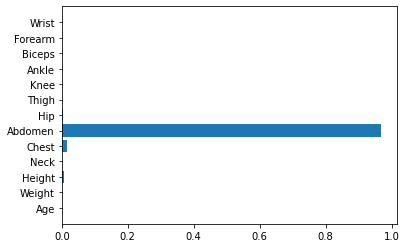

In [39]:
plt.barh(X.columns, model_random_forest.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

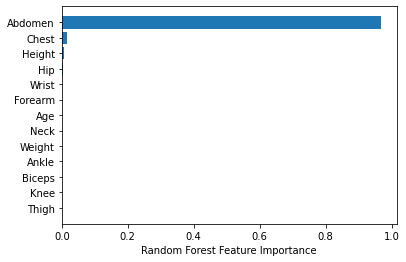

In [44]:
sorted_idx = model_random_forest.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], model_random_forest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [37]:
y_pred = model_random_forest.predict(X_test)

In [173]:
mean_squared_error(y_test, y_pred,squared=False)

4.503416708430629

In [174]:
mean_absolute_percentage_error(y_test[y_pred!=y_pred[22]], y_pred[y_pred!=y_pred[22]])

0.2249628691021066

## XGBoost

In [175]:
from sklearn import datasets, ensemble

In [177]:
model_XGBoost = ensemble.GradientBoostingRegressor(random_state=0)
model_XGBoost.fit(X_train, y_train)


GradientBoostingRegressor(random_state=0)

In [160]:
y_pred = model_XGBoost.predict(X_test)

In [161]:
mean_squared_error(y_test, y_pred,squared=False)

4.788157687731064

In [162]:
mean_absolute_percentage_error(y_test[y_pred!=y_pred[22]], y_pred[y_pred!=y_pred[22]])

0.241234229613716

## Lasso

In [21]:
from sklearn import linear_model
model_lasso = linear_model.Lasso(alpha=0.8,random_state=1)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.8, random_state=1)

In [27]:
lasso_coef=model_lasso.coef_    

In [35]:
lasso_coef

array([ 5.67167672e-03,  0.00000000e+00, -8.14625525e-01, -0.00000000e+00,
        0.00000000e+00,  5.82315773e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -7.15976866e-02])

In [33]:
X.columns

Index(['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh',
       'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')

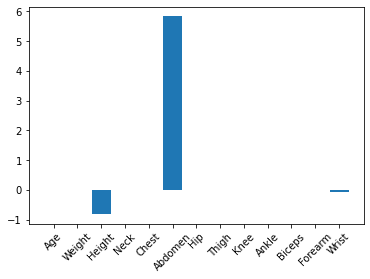

In [34]:
plt.bar(X.columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [205]:
y_pred = model_lasso.predict(X_test)

In [206]:
mean_squared_error(y_test, y_pred,squared=False)

4.426965653275816

In [207]:
mean_absolute_percentage_error(y_test[y_pred!=y_pred[22]], y_pred[y_pred!=y_pred[22]])

0.21852796650368678

## Ridge

In [212]:
model_lasso = linear_model.Ridge(alpha=0.2)
model_lasso.fit(X_train, y_train)

Ridge(alpha=0.2)

In [213]:
y_pred = model_lasso.predict(X_test)

In [214]:
mean_squared_error(y_test, y_pred,squared=False)

5.1762440853055605

In [215]:
mean_absolute_percentage_error(y_test[y_pred!=y_pred[22]], y_pred[y_pred!=y_pred[22]])

0.23946119183792844